In [1]:
import sys
import time

import numpy as np

sys.path.extend(['./../lib', './../helpers'])
from solvers_check import SolversCheck
from helpers import init_jupyter

data_path = './data/eq-1d_drift_linear'
init_jupyter()

Start |  4:53PM MSK on Sep 07, 2019 |
-------------------------------------


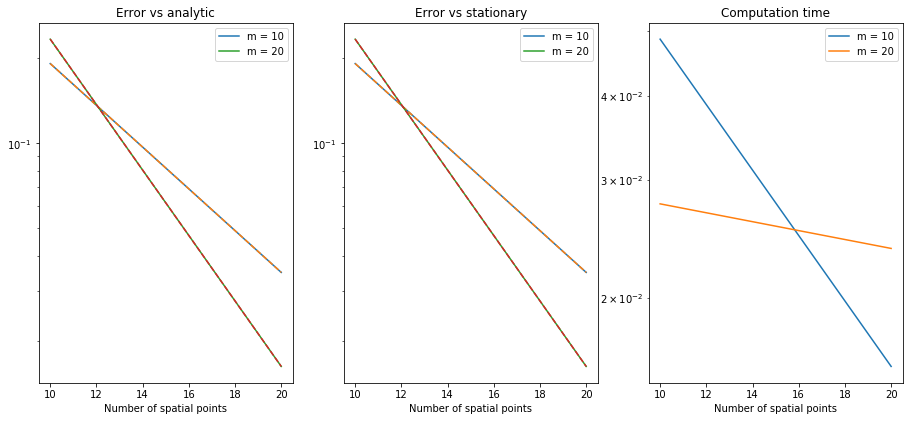



--------------- Approximations for error vs real solution
 m =       10 : e = 1.05e+00 * exp[- 1.70e-01 * n]
 m =       20 : e = 3.35e+00 * exp[- 2.66e-01 * n]
--------------- Approximations for error vs stat. solution
 m =       10 : e = 1.05e+00 * exp[- 1.70e-01 * n]
 m =       20 : e = 3.35e+00 * exp[- 2.66e-01 * n]


In [2]:
SLC = SolversCheck(data_path)
SLC.load()
SLC.plot_x('test1')

In [ ]:



E = DATA['ord%d'%ord]['E'].copy()
T = DATA['ord%d'%ord]['T'].copy()

for m in M:
    x = np.array(N)
    y = np.array(E[m])
    t = T[m].copy()

    l0 = lims.get(m, [None, None])[0]
    l1 = lims.get(m, [None, None])[1]

    xe = x[l0:l1]
    ye = y[l0:l1]
    b, a = np.polyfit(xe, np.log(ye), 1, w=np.sqrt(ye))
    a = np.exp(a)
    z1 = a * np.exp(b * x)

    fig = plt.figure(**config['plot']['fig']['base_1_2'])
    grd = mpl.gridspec.GridSpec(**config['plot']['grid']['base_1_2'])
    ax1 = fig.add_subplot(grd[0, 0])
    ax2 = fig.add_subplot(grd[0, 1])

    opts = config['plot']['line']['calc'].copy()
    opts['label'] = 'Solution'
    ax1.plot(x, y, **opts)

    opts = config['plot']['line']['init'].copy()
    opts['label'] = '%8.2e * exp[- %8.2e * n]'%(a, -b)
    ax1.plot(x, z1, **opts)

    ax1.set_title('Relative error at final time step (tpoi=%d)'%m)
    ax1.set_xlabel('Number of spatial points')
    ax1.set_ylabel('Relative error')
    ax1.legend(loc='best')
    ax1.semilogy()

    opts = config['plot']['line']['calc'].copy()
    opts['label'] = ''
    ax2.plot(N, [t_[1] for t_ in t], **opts)
    ax2.semilogy()
    ax2.set_title('Calculation time (sec.; tpoi=%d)'%m)
    ax2.set_xlabel('Number of spatial points')
    ax2.set_ylabel('Time, sec')

    plt.show()

In [2]:
s = 1.
A = 1.
Dc = 0.5

t_min = 0.
t_max = 1.
x_min = -5.
x_max = +5.

def func_f0(x, t):
    m = 0.
    return A * (m - x)

def func_f1(x, t):
    return -A * np.ones(x.shape)

def func_xm(t, x0):
    return np.exp(-A * t) * x0
 
def func_xc(t):
    return (1. - np.exp(-2. * A * t)) / 2. / A

def func_r0(x):
    m = 0.
    r = np.exp(-0.5 * (x - m)**2 / s) / np.sqrt(2. * np.pi * s)
    return r.reshape(-1)

def func_rx(x, t, x0):
    m = func_xm(t, x0)
    c = func_xc(t)
    r = np.exp(-0.5 * (x - m)**2 / c) / np.sqrt(2. * np.pi * c)
    return r.reshape(-1)

def func_rt(x, t):
    S = func_xc(t) + s * np.exp(-2. * A * t)
    r = np.exp(-0.5 * x**2 / S) / np.sqrt(2. * np.pi * S)
    return r.reshape(-1)

def func_rs(x):
    r = np.sqrt(A / np.pi) * np.exp(- A * x * x)
    return r.reshape(-1)

In [4]:
SLC = SolversCheck(fpath)
SLC.set_grid_t(t_min, t_max)
SLC.set_grid_x(x_min, x_max)
SLC.set_funcs(func_f0, func_f1, func_r0, func_rt, func_rs)
SLC.set_coefs(Dc)

M = [10, 20]
N = [10, 20]
SLC.add(name='test1', d=1, eps=1.E-6, ord=2, with_tt=False, M=M, N=N)

M = [50, 90]
N = [30, 40]
SLC.add(name='test2', d=1, eps=1.E-6, ord=2, with_tt=False, M=M, N=N)

#M = [10, 100, 1000, 10000, 100000]
#N = list(np.arange(10, 51, 5, dtype=int))

SLC.calc()
SLC.save()

----- Calc for solver | test1
----- Computation     | m = 10     | n = 10    


Solve: 100%|█| 9/9 [00:00<00:00, 913.15step/s, | At T=1.00e+00 : n=4.37e-01 e=1.91e-01 es=1.91e-01]


----- Computation     | m = 10     | n = 20    


Solve: 100%|█| 9/9 [00:00<00:00, 580.91step/s, | At T=1.00e+00 : n=6.61e-01 e=3.49e-02 es=3.49e-02]


----- Computation     | m = 20     | n = 10    


Solve: 100%|█| 19/19 [00:00<00:00, 714.58step/s, | At T=1.00e+00 : n=4.45e-01 e=2.33e-01 es=2.33e-01]


----- Computation     | m = 20     | n = 20    


Solve: 100%|█| 19/19 [00:00<00:00, 784.54step/s, | At T=1.00e+00 : n=6.68e-01 e=1.63e-02 es=1.63e-02]


----- Done            | Time : 5.15e+00 sec
----- Calc for solver | test2
----- Computation     | m = 50     | n = 30    


Solve: 100%|█| 49/49 [00:00<00:00, 800.01step/s, | At T=1.00e+00 : n=8.31e-01 e=6.74e-03 es=6.74e-03]


----- Computation     | m = 50     | n = 40    


Solve: 100%|█| 49/49 [00:00<00:00, 606.80step/s, | At T=1.00e+00 : n=9.63e-01 e=6.74e-03 es=6.74e-03]


----- Computation     | m = 90     | n = 30    


Solve: 100%|█| 89/89 [00:00<00:00, 863.86step/s, | At T=1.00e+00 : n=8.32e-01 e=3.71e-03 es=3.71e-03]


----- Computation     | m = 90     | n = 40    


Solve: 100%|█| 89/89 [00:00<00:00, 643.71step/s, | At T=1.00e+00 : n=9.65e-01 e=3.71e-03 es=3.71e-03]


----- Done            | Time : 5.42e+00 sec


In [5]:
SLC.load()

In [4]:
SLC.res

{'test1': {'d': 1,
  'eps': 1e-06,
  'ord': 2,
  'with_tt': False,
  'M': [10, 20],
  'N': [10, 20],
  '10-10': {'t_prep': 0.0705101490020752,
   't_calc': 0.007395267486572266,
   't_spec': 1567858201.6323287,
   'err': 0.1913057045228829,
   'err_stat': 0.1913057045228829},
  '10-20': {'t_prep': 0.00673222541809082,
   't_calc': 0.011536836624145508,
   't_spec': 1567858202.6608942,
   'err': 0.03494578107282583,
   'err_stat': 0.03494578107282583},
  '20-10': {'t_prep': 0.0012941360473632812,
   't_calc': 0.026362895965576172,
   't_spec': 1567858203.678754,
   'err': 0.2333721762347486,
   'err_stat': 0.2333721762347486},
  '20-20': {'t_prep': 0.0023407936096191406,
   't_calc': 0.021138429641723633,
   't_spec': 1567858204.7162538,
   'err': 0.016254008211623483,
   'err_stat': 0.016254008211623483}},
 'test2': {'d': 1,
  'eps': 1e-06,
  'ord': 2,
  'with_tt': False,
  'M': [50, 90],
  'N': [30, 40],
  '50-30': {'t_prep': 0.0045201778411865234,
   't_calc': 0.08998370170593262,
  

<div class="head1">
    <div class="head1__name">
        Helpers
    </div>
</div>

In [5]:
def calc(SL, m, n, E, T):
    if not E.get(m): E[m] = []
    if not T.get(m): T[m] = []
        
    SL.set_grid_t(m, t_min, t_max, t_hst=1)
    SL.set_grid_x(n, x_min, x_max)
    SL.set_funcs(func_f0, func_f1, func_r0, func_rt, func_rs)
    SL.set_coefs(Dc)
    SL.prep()
    SL.calc()

    T[m].append([SL._t_prep, SL._t_calc, SL._t_spec])
    E[m].append(SL._err)

<div class="head1">
    <div class="head1__name">
        Computations for the 1th order solver
    </div>
</div>

In [6]:
_t = time.time()

E, T = {}, {}
  
for m in M:
    for n in list(N):
        print('----- Computation | m = %-6d | n = %-6d'%(m, n))
        time.sleep(1)
        calc(Solver(d=1, ord=1), m, n, E, T)
        
save(fpath, DATA, 1, M, N, E, T, opts)

time.sleep(1)
print('----- Done        | Total time : %-8.2e sec'%(time.time()-_t))

----- Computation | m = 10     | n = 10    


Solve: 100%|█| 9/9 [00:00<00:00, 1185.43step/s, | At T = 1.00e+00 : error = 1.80e-01]


----- Computation | m = 10     | n = 15    


Solve: 100%|█| 9/9 [00:00<00:00, 804.59step/s, | At T = 1.00e+00 : error = 6.76e-02]


----- Computation | m = 10     | n = 20    


Solve: 100%|█| 9/9 [00:00<00:00, 726.16step/s, | At T = 1.00e+00 : error = 5.47e-02]


----- Computation | m = 10     | n = 25    


Solve: 100%|█| 9/9 [00:00<00:00, 620.56step/s, | At T = 1.00e+00 : error = 5.61e-02]


----- Computation | m = 10     | n = 30    


Solve: 100%|█| 9/9 [00:00<00:00, 427.62step/s, | At T = 1.00e+00 : error = 5.60e-02]


----- Computation | m = 10     | n = 35    


Solve: 100%|█| 9/9 [00:00<00:00, 441.44step/s, | At T = 1.00e+00 : error = 5.60e-02]


----- Computation | m = 10     | n = 40    


Solve: 100%|█| 9/9 [00:00<00:00, 262.54step/s, | At T = 1.00e+00 : error = 5.60e-02]


----- Computation | m = 10     | n = 45    


Solve: 100%|█| 9/9 [00:00<00:00, 299.14step/s, | At T = 1.00e+00 : error = 5.60e-02]


----- Computation | m = 10     | n = 50    


Solve: 100%|█| 9/9 [00:00<00:00, 307.84step/s, | At T = 1.00e+00 : error = 5.60e-02]


----- Computation | m = 100    | n = 10    


Solve: 100%|█| 99/99 [00:00<00:00, 1122.33step/s, | At T = 1.00e+00 : error = 2.40e-01]


----- Computation | m = 100    | n = 15    


Solve: 100%|█| 99/99 [00:00<00:00, 1153.58step/s, | At T = 1.00e+00 : error = 1.10e-01]


----- Computation | m = 100    | n = 20    


Solve: 100%|█| 99/99 [00:00<00:00, 1067.96step/s, | At T = 1.00e+00 : error = 6.81e-03]


----- Computation | m = 100    | n = 25    


Solve: 100%|█| 99/99 [00:00<00:00, 767.79step/s, | At T = 1.00e+00 : error = 5.56e-03]


----- Computation | m = 100    | n = 30    


Solve: 100%|█| 99/99 [00:00<00:00, 921.88step/s, | At T = 1.00e+00 : error = 5.50e-03]


----- Computation | m = 100    | n = 35    


Solve: 100%|█| 99/99 [00:00<00:00, 339.85step/s, | At T = 1.00e+00 : error = 5.50e-03]


----- Computation | m = 100    | n = 40    


Solve: 100%|█| 99/99 [00:00<00:00, 688.28step/s, | At T = 1.00e+00 : error = 5.50e-03]


----- Computation | m = 100    | n = 45    


Solve: 100%|█| 99/99 [00:00<00:00, 508.63step/s, | At T = 1.00e+00 : error = 5.50e-03]


----- Computation | m = 100    | n = 50    


Solve: 100%|█| 99/99 [00:00<00:00, 404.52step/s, | At T = 1.00e+00 : error = 5.50e-03]


----- Computation | m = 1000   | n = 10    


Solve: 100%|█| 999/999 [00:00<00:00, 1965.70step/s, | At T = 1.00e+00 : error = 2.49e-01]


----- Computation | m = 1000   | n = 15    


Solve: 100%|█| 999/999 [00:00<00:00, 1398.52step/s, | At T = 1.00e+00 : error = 1.13e-01]


----- Computation | m = 1000   | n = 20    


Solve: 100%|█| 999/999 [00:00<00:00, 1341.16step/s, | At T = 1.00e+00 : error = 6.18e-03]


----- Computation | m = 1000   | n = 25    


Solve: 100%|█| 999/999 [00:01<00:00, 929.09step/s, | At T = 1.00e+00 : error = 9.93e-04]


----- Computation | m = 1000   | n = 30    


Solve: 100%|█| 999/999 [00:01<00:00, 747.14step/s, | At T = 1.00e+00 : error = 5.49e-04]


----- Computation | m = 1000   | n = 35    


Solve: 100%|█| 999/999 [00:01<00:00, 724.70step/s, | At T = 1.00e+00 : error = 5.48e-04]


----- Computation | m = 1000   | n = 40    


Solve: 100%|█| 999/999 [00:01<00:00, 604.07step/s, | At T = 1.00e+00 : error = 5.48e-04]


----- Computation | m = 1000   | n = 45    


Solve: 100%|█| 999/999 [00:01<00:00, 619.81step/s, | At T = 1.00e+00 : error = 5.48e-04]


----- Computation | m = 1000   | n = 50    


Solve: 100%|█| 999/999 [00:01<00:00, 606.82step/s, | At T = 1.00e+00 : error = 5.48e-04]


----- Computation | m = 10000  | n = 10    


Solve: 100%|█| 9999/9999 [00:04<00:00, 2006.82step/s, | At T = 1.00e+00 : error = 2.50e-01]


----- Computation | m = 10000  | n = 15    


Solve: 100%|█| 9999/9999 [00:06<00:00, 1536.73step/s, | At T = 1.00e+00 : error = 1.14e-01]


----- Computation | m = 10000  | n = 20    


Solve: 100%|█| 9999/9999 [00:07<00:00, 1255.93step/s, | At T = 1.00e+00 : error = 6.33e-03]


----- Computation | m = 10000  | n = 25    


Solve: 100%|█| 9999/9999 [00:09<00:00, 1055.81step/s, | At T = 1.00e+00 : error = 8.32e-04]


----- Computation | m = 10000  | n = 30    


Solve: 100%|█| 9999/9999 [00:11<00:00, 877.12step/s, | At T = 1.00e+00 : error = 6.46e-05]


----- Computation | m = 10000  | n = 35    


Solve: 100%|█| 9999/9999 [00:12<00:00, 801.55step/s, | At T = 1.00e+00 : error = 5.45e-05]


----- Computation | m = 10000  | n = 40    


Solve: 100%|█| 9999/9999 [00:12<00:00, 800.20step/s, | At T = 1.00e+00 : error = 5.45e-05]


----- Computation | m = 10000  | n = 45    


Solve: 100%|█| 9999/9999 [00:16<00:00, 611.51step/s, | At T = 1.00e+00 : error = 5.45e-05]


----- Computation | m = 10000  | n = 50    


Solve: 100%|█| 9999/9999 [00:17<00:00, 580.46step/s, | At T = 1.00e+00 : error = 5.45e-05]


----- Computation | m = 100000 | n = 10    


Solve: 100%|█| 99999/99999 [00:53<00:00, 1873.97step/s, | At T = 1.00e+00 : error = 2.50e-01]


----- Computation | m = 100000 | n = 15    


Solve: 100%|█| 99999/99999 [01:09<00:00, 1446.73step/s, | At T = 1.00e+00 : error = 1.14e-01]


----- Computation | m = 100000 | n = 20    


Solve: 100%|█| 99999/99999 [01:26<00:00, 1161.55step/s, | At T = 1.00e+00 : error = 6.35e-03]


----- Computation | m = 100000 | n = 25    


Solve: 100%|█| 99999/99999 [01:40<00:00, 996.44step/s, | At T = 1.00e+00 : error = 8.30e-04] 


----- Computation | m = 100000 | n = 30    


Solve: 100%|█| 99999/99999 [01:54<00:00, 869.73step/s, | At T = 1.00e+00 : error = 3.54e-05] 


----- Computation | m = 100000 | n = 35    


Solve: 100%|█| 99999/99999 [02:14<00:00, 742.50step/s, | At T = 1.00e+00 : error = 5.46e-06]


----- Computation | m = 100000 | n = 40    


Solve: 100%|█| 99999/99999 [02:41<00:00, 619.54step/s, | At T = 1.00e+00 : error = 5.18e-06]


----- Computation | m = 100000 | n = 45    


Solve: 100%|█| 99999/99999 [03:11<00:00, 521.18step/s, | At T = 1.00e+00 : error = 5.18e-06]


----- Computation | m = 100000 | n = 50    


Solve: 100%|█| 99999/99999 [02:52<00:00, 578.72step/s, | At T = 1.00e+00 : error = 5.18e-06]


----- Done        | Total time : 1.24e+03 sec


<div class="head1">
    <div class="head1__name">
        Computations for the 2th order solver
    </div>
</div>

In [7]:
_t = time.time()

E, T = {}, {}
  
for m in M:
    for n in list(N):
        print('----- Computation | m = %-6d | n = %-6d'%(m, n))
        time.sleep(1)
        calc(Solver(d=1, ord=2), m, n, E, T)
        
save(fpath, DATA, 2, M, N, E, T, opts)

time.sleep(1)
print('----- Done        | Total time : %-8.2e sec'%(time.time()-_t))

----- Computation | m = 10     | n = 10    


Solve:   0%|                                            | 0/9 [00:00<?, ?step/s]

AttributeError: 'NoneType' object has no attribute 'reshape'

<div class="head1">
    <div class="head1__name">
        Results
    </div>
</div>

In [ ]:
import sys; sys.path.extend(['./../lib', './../helpers'])
from helpers import load_mnet as load
from helpers import show_mnet_ord as show_ord
from helpers import show_mnet_ords as show_ords

fpath = './data/eq-1d_drift_linear'

In [ ]:
DATA = load(fpath)
lim = {
    10: [1, 6],
    100: [1, 6],
    1000: [1, 6],
    10000: [1, 6],
    100000: [1, 6],
}

In [ ]:
show_ords(DATA, lim)

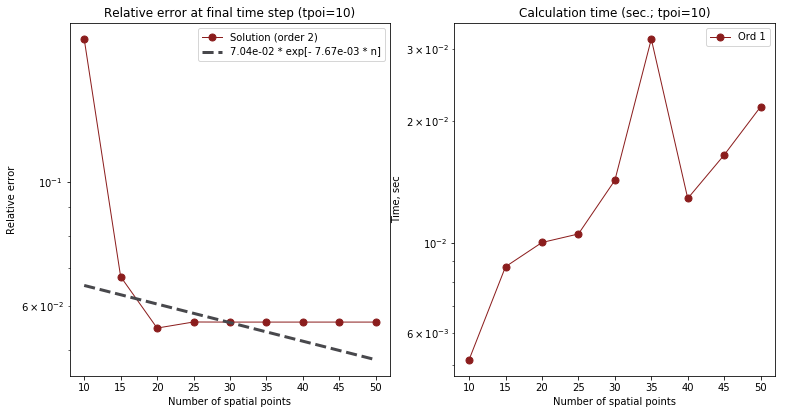

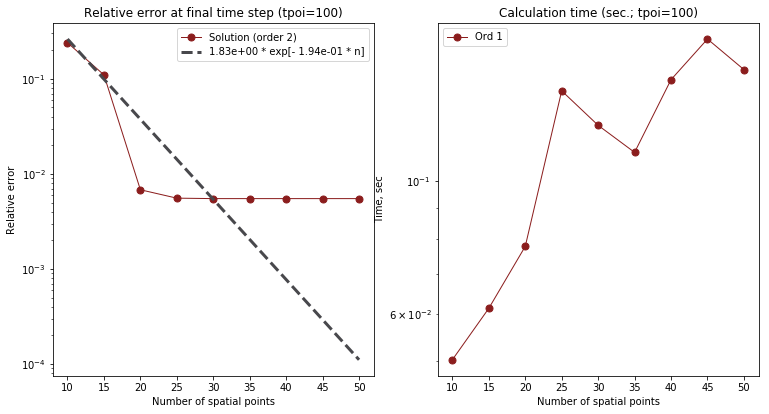

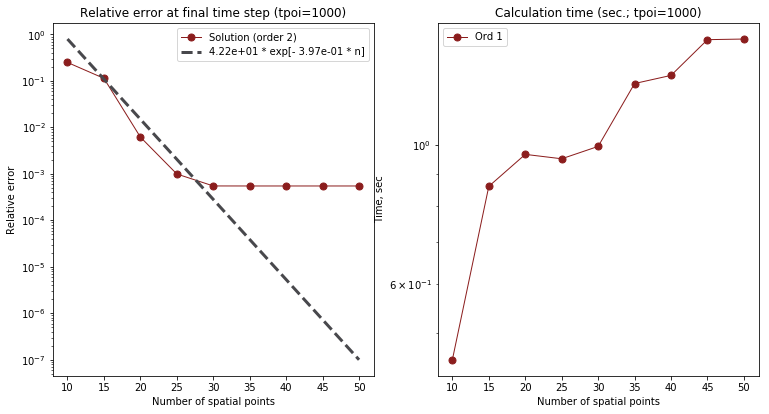

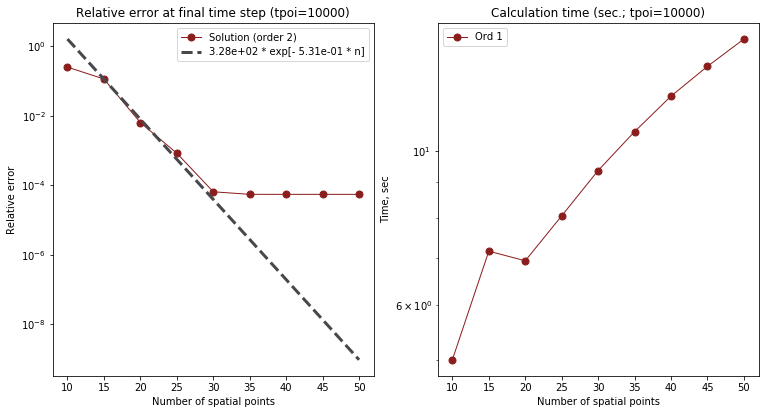

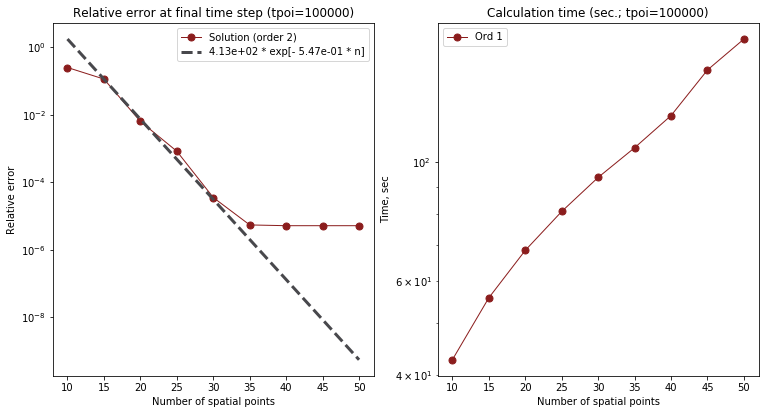

In [3]:
show_ord(DATA, 1, lim)

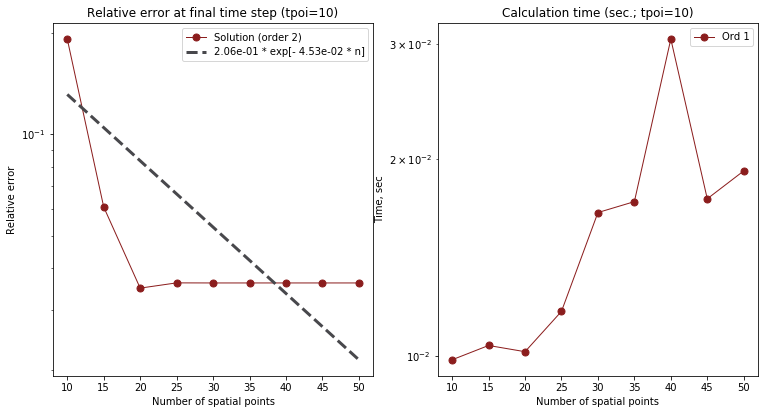

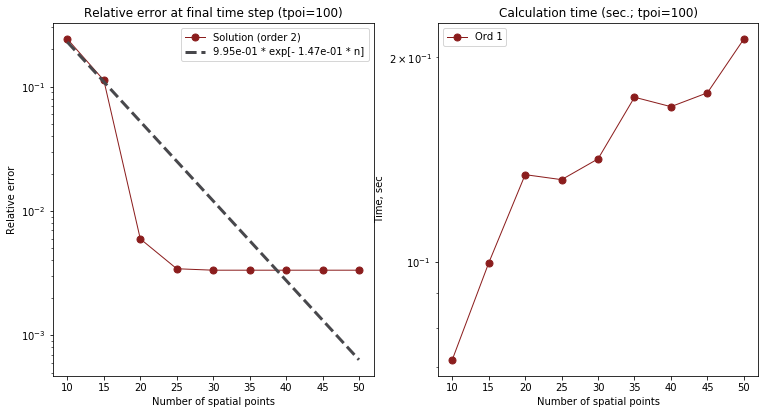

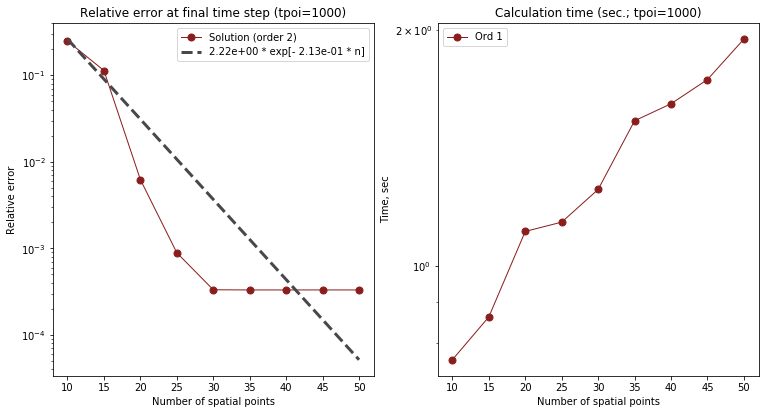

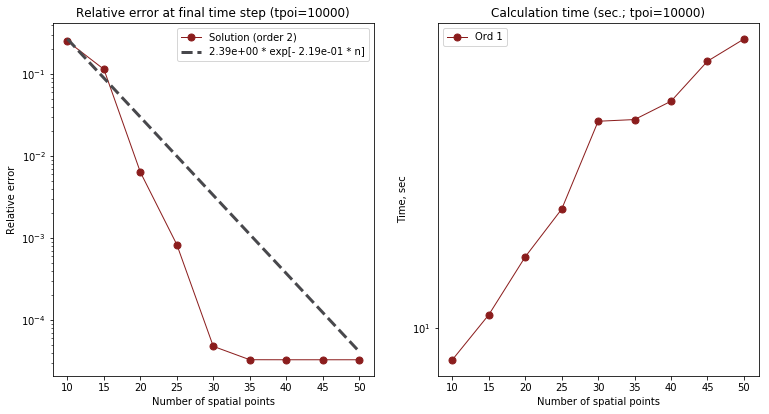

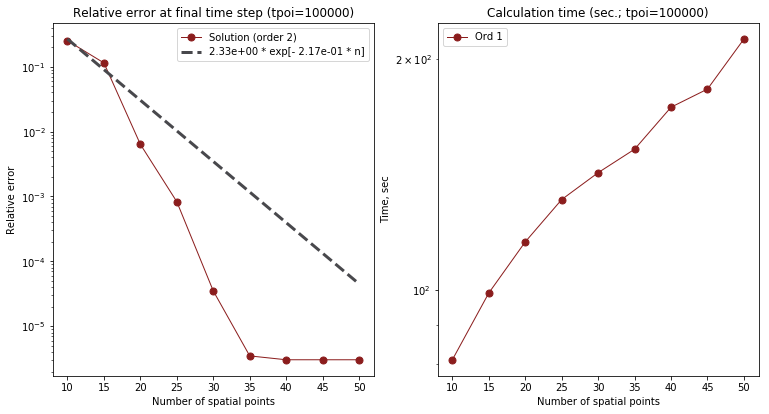

In [10]:
show_ord(DATA, 2)

<div class="head1">
    <div class="head1__name">
        Results vs time
    </div>
</div>

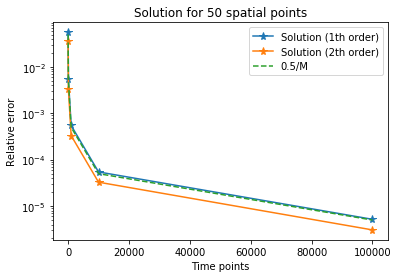

In [58]:
import matplotlib.pyplot as plt

i = -1
n = DATA['ord1']['N'][i]
M = np.array(DATA['ord1']['M'])

E1 = np.array([DATA['ord1']['E'][m][i] for m in M])
plt.plot(M, E1, label='Solution (1th order)', marker='*', markersize=8)

a, b, c = np.polyfit(1./M, E1, 2)
E_ = a * (1./M)**2 + b * (1./M) + c
#plt.plot(M, E_, '-.', label='%8.2e m^2 + %8.2e m + %8.2e'%(a, b, c))

E2 = np.array([DATA['ord2']['E'][m][i] for m in M])
plt.plot(M, E2, label='Solution (2th order)', marker='*', markersize=8)

a, b, c = np.polyfit(1./M, E2, 2)
E_ = a * (1./M)**2 + b * (1./M) + c
#plt.plot(M, E_, '-.', label='%8.2e / m^2 + %8.2e / m + %8.2e'%(a, b, c))

plt.plot(M, 0.5/M, '--', label='0.5/M')
#plt.plot(M, 12000./M**2, '--', label='0.5/M^2')

plt.semilogy()
plt.title('Solution for %d spatial points'%n)
plt.xlabel('Time points')
plt.ylabel('Relative error')
plt.legend(loc='best')
plt.show()

In [23]:
np.polyfit?

Signature: np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Docstring:
Least squares polynomial fit.

Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error.

Parameters
----------
x : array_like, shape (M,)
    x-coordinates of the M sample points ``(x[i], y[i])``.
y : array_like, shape (M,) or (M, K)
    y-coordinates of the sample points. Several data sets of sample
    points sharing the same x-coordinates can be fitted at once by
    passing in a 2D-array that contains one dataset per column.
deg : int
    Degree of the fitting polynomial
rcond : float, optional
    Relative condition number of the fit. Singular values smaller than
    this relative to the largest singular value will be ignored. The
    default value is len(x)*eps, where eps is the relative precision of
    the float type, about 2e-16 in most cases.
full : bool, optional
    Switch determinin

<div class="end"></div>